In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

salary_data = pd.read_csv('salary.csv')
salary_data.head()


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## 1. How many responders are there? Are there any missing values in any of the variables?

In [14]:
print(len(salary_data))
print(salary_data.isnull().sum())

514
salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64


In total there are 514 responders, There is currently one missing variable in the Salary column, which could mean that either the information was not entered intentionally or ommited by mistake. This does have a affect on the way we red our data, as from the beginning this value should be dropped or either replaced in order not to affect our models.

## 2. What is the lowest salary and highest salary in the group?

In [15]:
print(salary_data['salary'].min())
print(salary_data['salary'].max())

29000.0
96156.0


The minimum salary is 29000.00 and the highest was 96156.00

## 3. What is the mean salary for the sample? Include the standard error of the mean.

In [16]:
print(salary_data['salary'].mean())
print(salary_data['salary'].sem())

50863.22009783626
560.0622753925232


The mean for the salary 50863.22009783626, meaning that the avaerage salary of the dat was about 50863.22, which is considerably where most people are earning, with exception to a ffew outliers, and the standard error of the mean was 560.0622753925232, which is the estimated error for the model.


## 4. What is the standard deviation for the years worked?

In [17]:
print(salary_data['yearsworked'].std())

9.444695144169813


The standard deviation for the years worked is 9.444695144169813. this shows that the  the data points are spread out over a wider range of values. There are multiple data points between the minimum and maximum values.

## 5. What is the median salary for the sample?

In [18]:
print(salary_data['salary'].median())

50096.0


The median for the salary is 50096.0, which is close to what the average salary is. This shows that the data set has a symmetrical distribution. This represents the balancing points in the dataset.

## 6. What is the interquartile range for salary in the sample?

In [19]:
q1 = salary_data['salary'].quantile(0.25)
q3 = salary_data['salary'].quantile(0.75)
print(q3 - q1)

# salary_data.describe()

20345.0


The interquartile range is Q3 - Q1, which is 20345, this describes the middle 50% of the values. The interquartile is often seen as a better measure of spread than the range as it is not affected by outliers. 

## 7.How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [61]:
men = salary_data['male'].value_counts()
men.rename(index={0:'Feale',1:'Male'}, inplace=True)
men.columns = ["Gender"]
print(men)


Male     386
Feale    128
Name: male, dtype: int64


pandas.core.series.Series

There is a total of 386 men and 128 women

## 8. How many women are executives compared to men?

In [71]:
women_execs = ((salary_data['position'] == 3) & (salary_data['male'] == 0))
men_execs = ((salary_data['position'] == 3) & (salary_data['male'] == 1)) 
print(women_execs.value_counts().iloc[1])
print(men_execs.value_counts().iloc[1])


19
192


There are a total of 19 women executives and 192 male executives, which means there are 173 more male executives

## 9. Create a histogram for the variable Salary.

Text(0, 0.5, 'Number of People')

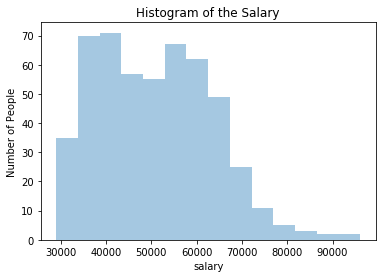

In [24]:
my_salary = salary_data['salary'].fillna(salary_data['salary'].mean())
sns.distplot(my_salary, kde = False)
plt.title('Histogram of the Salary')
plt.ylabel('Number of People')
# sns.distplot(salary_data['salary'], kde = False)


## 10. Examine the histogram and describe the distribution for Salary.

The histogram shows that there a less people who are in the last quantile and the first, the average of people are in the interquartile range which is also where the median is located. 

In [143]:
salary_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

In [142]:
import scipy as sp

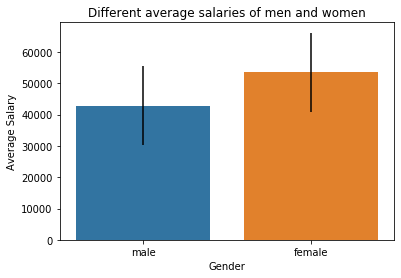

In [76]:
average_salary = salary_data['salary'].groupby(salary_data['male']).mean()
average_salary = average_salary.to_frame()
average_salary.index = ['male','female']
sal_std = salary_data['salary'].std()
sns.barplot(x=average_salary.index, y="salary", data=average_salary,yerr = sal_std, ci = 95)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Different average salaries of men and women')
plt.show()

The average women tend to earn more than the men, with our data set we found that there were more men then women in the data set. Meaning with more data the men data would less likely be affected.

## 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). 


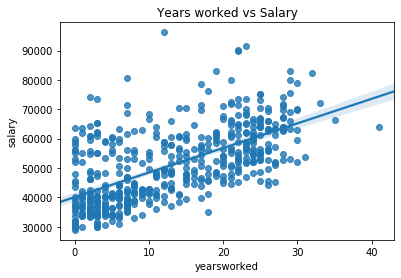

In [35]:
sns.regplot(x = salary_data['yearsworked'], y = my_salary)
plt.title('Years worked vs Salary')
plt.show()

The more years worked and salary have a positvely strong relationship, although correlation is not equal to causation. 

## 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary

In [75]:
from scipy.stats import pearsonr
p = pearsonr(salary_data['yearsworked'], my_salary)
print(p)

(0.6231354820920553, 1.2747795189687997e-56)
